# Data

## Parker Solar Probe data
The parameters are:

- 'psp_fld_l2_mag_RTN_4_Sa_per_Cyc' (B in RTN, 0.25s resolution)
- 'psp_swp_spi_sf00_L3_DENS' (Ion density, regular resolution)
- 'psp_swp_spi_af00_L3_DENS' (Ion density, burst resolution)
- 'psp_swp_spi_sf00_L3_VEL_RTN_SUN' (velocity in RTN in Sun's frame, regular resolution)
- 'psp_swp_spi_af00_L3_VEL_RTN_SUN' (velocity in RTN in Sun's frame, burst resolution)
- 'psp_swp_spi_sf00_L3_VEL_RTN' (velocity in RTN in spacecraft frame, regular resolution, you need this to calculate current sheet thickness)
- 'psp_swp_spi_af00_L3_VEL_RTN' (velocity in RTN in spacecraft frame, burst resolution, you need this to calculate current sheet thickness)
- 'Tp_spani_b' (Ion parallel and perpendicular ion temperature, regular resolution. Blue (first element in array): parallel, Red: perp)
- 'Tp_spanib_b' (Ion parallel and perpendicular ion temperature, burst resolution. Blue (first element in array): parallel, Red: perp)

## ARTEMIS data

- [ ] Why sometimes we don't have pressure tensor but have temperature tensor?

- THB_L2_MOM

  - `thb_peem_ptens_magQ` -----Electron Pressure Tensor, Field Aligned

  - `thb_peem_t3_magQ` -----Electron Temperature, Field Aligned (TprpFA1, TprpFA2, TparFA)

  - `thb_peim_ptens_magQ` -----Ion Pressure Tensor, Field Aligned

  - `thb_peim_t3_magQ` -----Ion Temperature, Field Aligned (TprpFA1, TprpFA2, TparFA)


In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
from psp.config import WindConfig, THEMISConfig
from psp.config.psp import PSPConfig
from speasy.core.requests_scheduling.request_dispatch import init_cdaweb
from discontinuitypy.utils.plot import plot_candidates

In [9]:
init_cdaweb()

24-Aug-24 20:42:50: Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConnectionPool(host='sciqlop.lpp.polytechnique.fr', port=80): Read timed out. (read timeout=1)")': /cache/get_inventory?provider=ssc
24-Aug-24 20:42:53: Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConnectionPool(host='sciqlop.lpp.polytechnique.fr', port=80): Read timed out. (read timeout=1)")': /cache/get_inventory?provider=ssc
24-Aug-24 20:42:58: Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConnectionPool(host='sciqlop.lpp.polytechnique.fr', port=80): Read timed out. (read timeout=1)")': /cache/get_inventory?provider=ssc
24-Aug-24 20:43:07: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConne

In [30]:
encs = [7]
configs = [PSPConfig, THEMISConfig, WindConfig]

for enc in encs:
    for cls in configs:
        cls(enc=enc).produce_or_load()

0 : psp_fld_l2_mag_RTN_4_Sa_per_Cyc
1 : psp_swp_spi_sf00_L3_DENS
2 : psp_swp_spi_sf00_L3_VEL_RTN_SUN
3 : psp_swp_spi_sf00_L3_VEL_RTN
4 : psp_swp_spi_af00_L3_DENS
5 : psp_swp_spi_af00_L3_VEL_RTN_SUN
6 : psp_swp_spi_af00_L3_VEL_RTN
7 : Tp_spani_b
8 : Tp_spanib_b
9 : mva_data_temp_mva_mat
10 : None_temp_rot
11 : None_temp_rot_x
12 : None_temp_rot_y
13 : None_temp_rot_z
14 : None_temp_rot_tot


## Wind examples

2024-08-24 20:57:30.802 | INFO     | discontinuitypy.utils.plot:plot_candidates:265 - Candidates indices: [ 195  303  743 1332]


[(<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 2422.06 \\mathrm{km}$, $j: -0.16 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>]),
 (<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 200.73 \\mathrm{km}$, $j: 1.63 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>]),
 (<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 208.13 \\mathrm{km}$, $j: -7.57 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>]),
 (<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: nan \\mathrm{km}$, $j: nan \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>])]

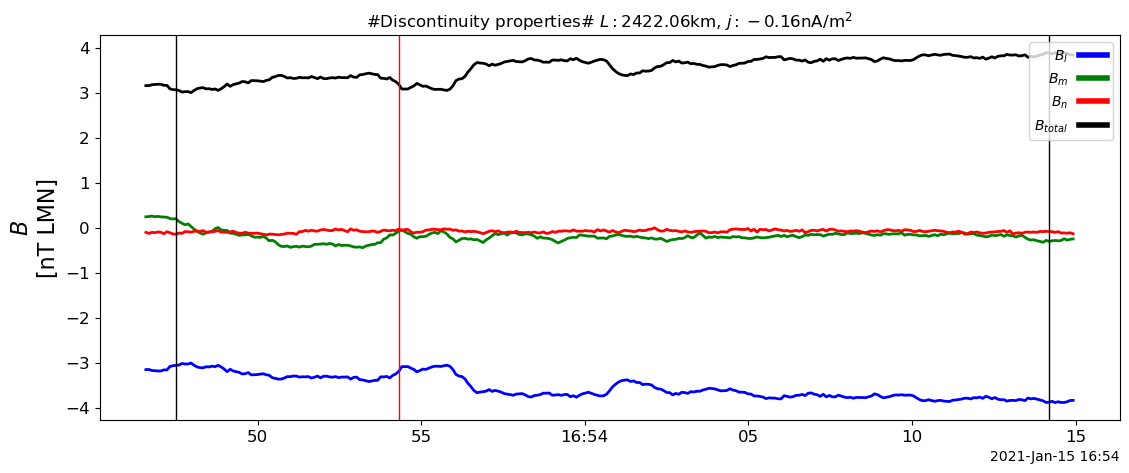

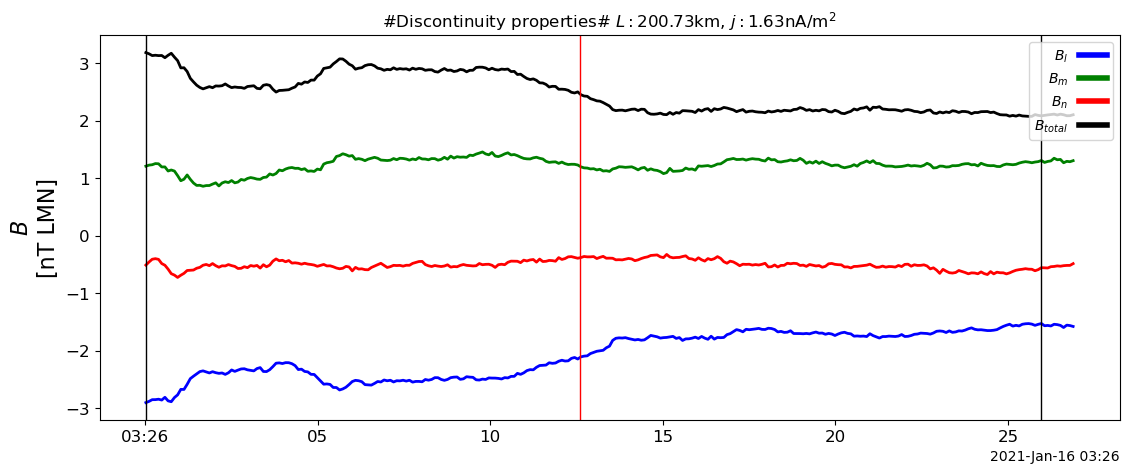

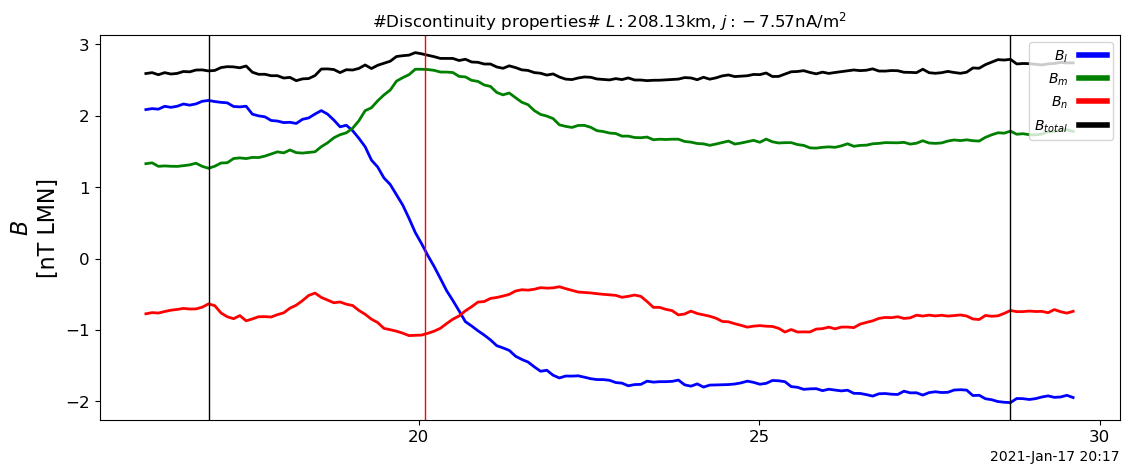

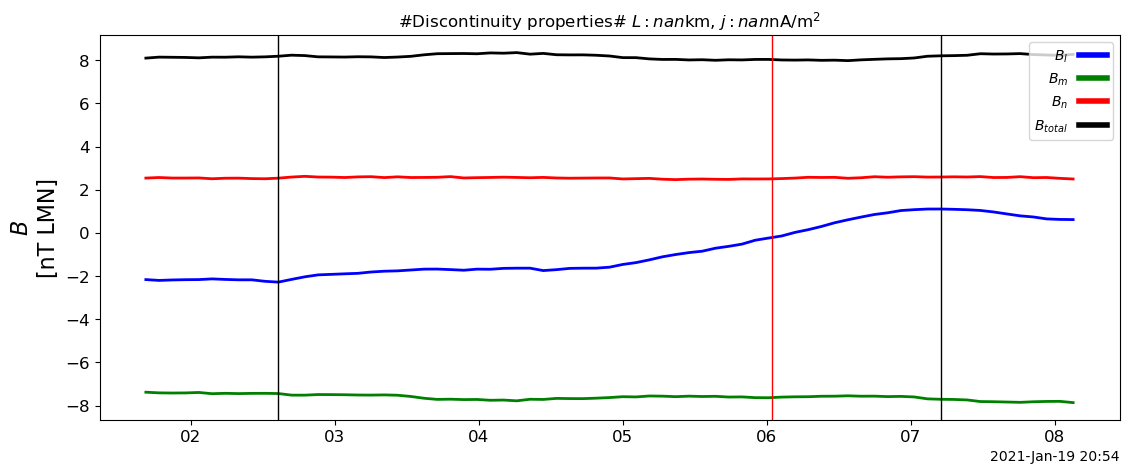

In [34]:
w_conf = WindConfig(enc=enc).get_data().find_events()
plot_candidates(w_conf)

## Themis Examples

24-Aug-24 20:49:47: Can't get THB_L2_MOM/thb_peim_densityQ without web service, switching to web service
24-Aug-24 20:49:47: Can't get THB_L2_MOM/thb_peim_velocity_gseQ without web service, switching to web service
24-Aug-24 20:49:47: Can't get THB_L2_MOM/thb_peim_ptotQ without web service, switching to web service
24-Aug-24 20:49:47: Can't get THB_L2_MOM/thb_peim_densityQ without web service, switching to web service
24-Aug-24 20:49:47: Can't get THB_L2_MOM/thb_peim_velocity_gseQ without web service, switching to web service
24-Aug-24 20:49:47: Can't get THB_L2_MOM/thb_peim_ptotQ without web service, switching to web service
2024-08-24 20:49:47.299 | INFO     | discontinuitypy.utils.plot:plot_candidates:265 - Candidates indices: [217 182 318 225]


[(<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 320.62 \\mathrm{km}$, $j: 3.94 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>]),
 (<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 191.30 \\mathrm{km}$, $j: -2.40 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>]),
 (<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 1841.91 \\mathrm{km}$, $j: 1.15 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>]),
 (<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 1271.68 \\mathrm{km}$, $j: -1.00 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>])]

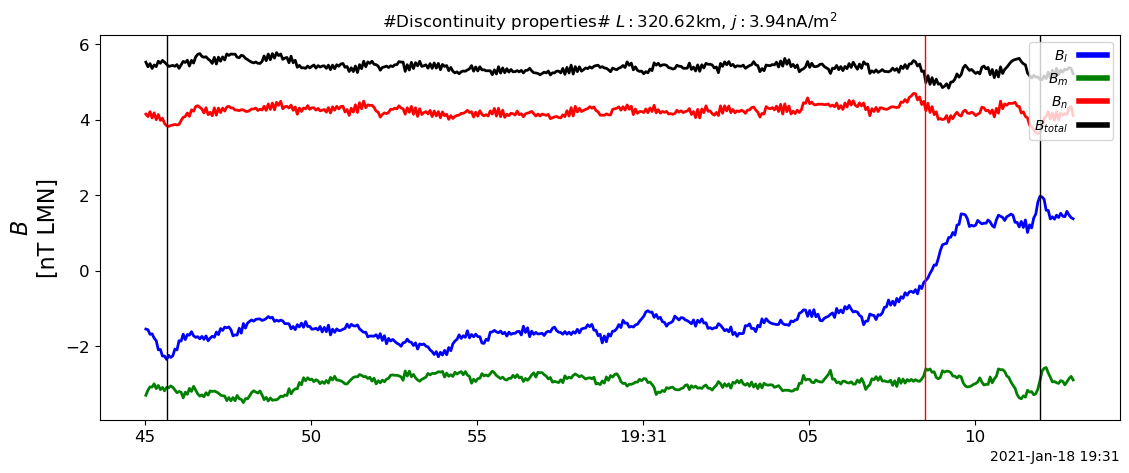

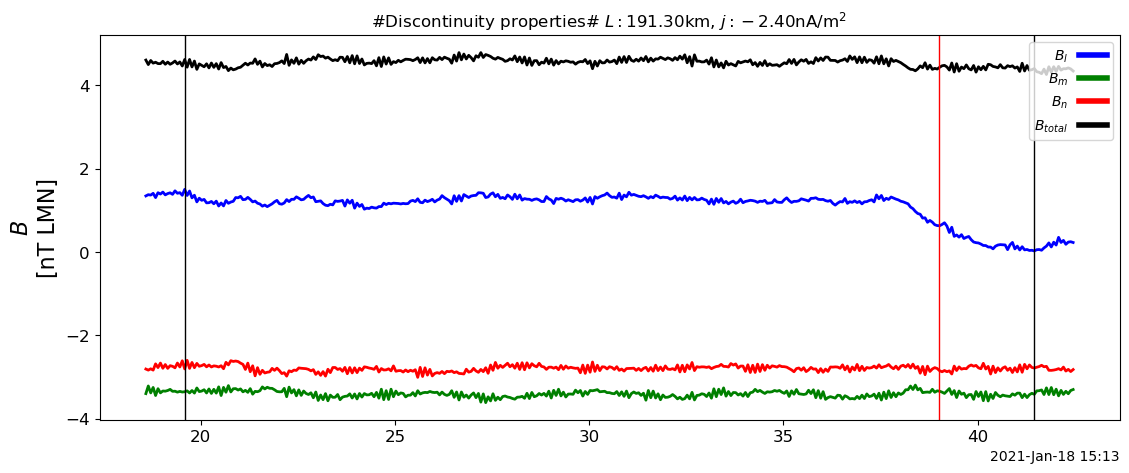

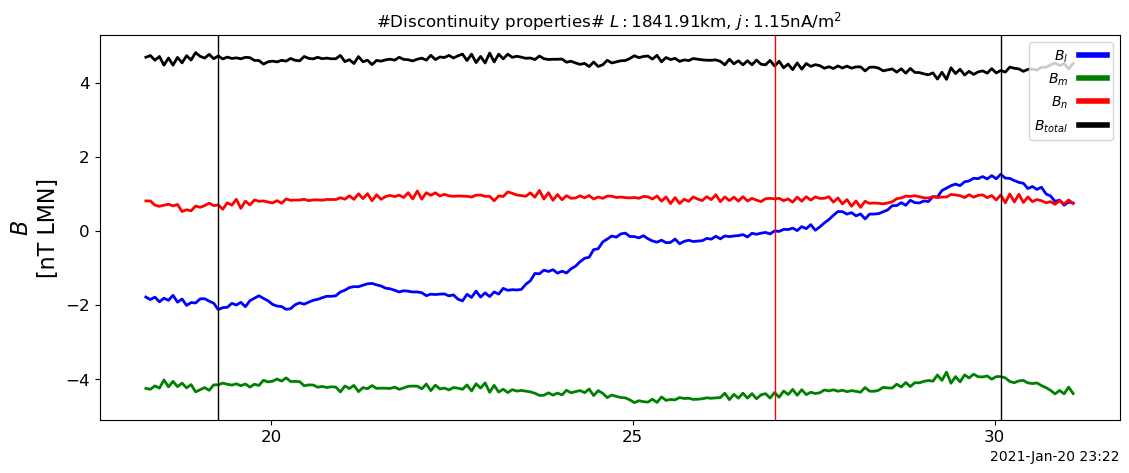

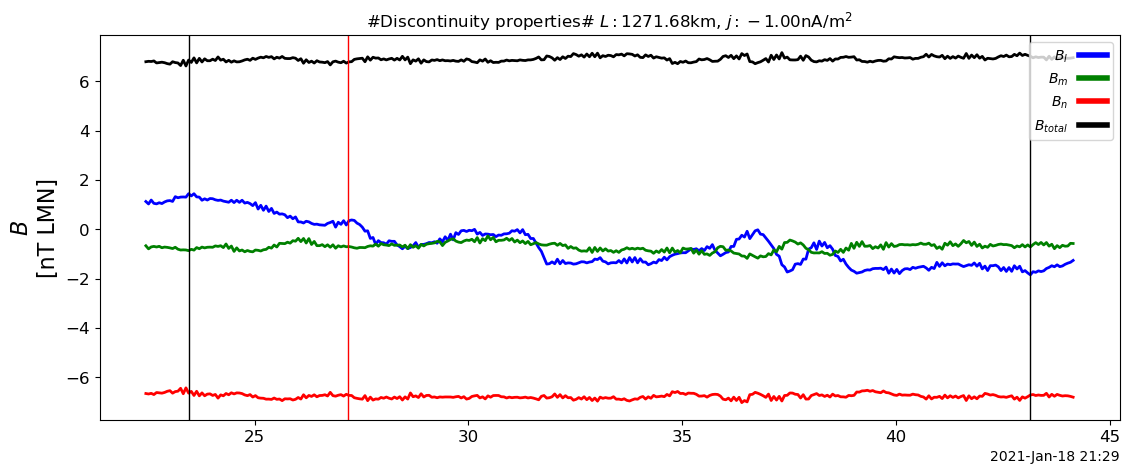

In [21]:
thm_conf = THEMISConfig(enc=enc).get_data().find_events()
plot_candidates(thm_conf)